In [117]:
import numpy as np
import cv2
import argparse
import random
import time
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
weights_path = "./mask-rcnn/mask-rcnn-coco/frozen_inference_graph.pb"
config_path = "./mask-rcnn/mask-rcnn-coco/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"
image_path = ""
confidence = 0.5
threshold = 0.3


In [119]:
labels = open("./mask-rcnn/mask-rcnn-coco/object_detection_classes_coco.txt").read().strip().split()

In [120]:
colors = open("./mask-rcnn/mask-rcnn-coco/colors.txt").read().strip().split()
colors = [np.array(c.split(",")).astype("int") for c in colors]
colors = np.array(colors, dtype=np.uint8)

In [121]:
net = cv2.dnn.readNetFromTensorflow(weights_path, config_path)

In [122]:
img = cv2.imread("./mask-rcnn/images/example_01.jpg")

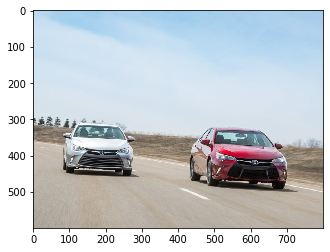

In [88]:
plt.imshow(img[:, :, ::-1])

In [89]:
(H,W) = img.shape[:2]

In [123]:
blob = cv2.dnn.blobFromImage(img)
# blobs = cv2.dnn.blobFromImages(imgs, swapRB=True, crop=False) # Batch size

In [127]:
net.setInput(blob)

In [128]:
(proposals, detections, masks) = net.forward(["proposals", "detection_out_final", "detection_masks"])

In [147]:
final_boxes = []
final_classes = []
final_masks = []

In [149]:
mask = cv2.resize(masks[0,0], (W,H))
mask[mask > threshold]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False],
       [False, False,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True, False, False],
       [False, False,  True,  True,  True, False, False,  True,  True,
         True,  True,  True,  True,  True, False],
       [False, False,  True,  True, False, False, False, False, False,
        False,  True,  True,  True,  True, False],
       [False, False,  True, False, False, False, False, False, False,
        False,  True,  True,  True,  True, False],
       [False, False, Fa

In [130]:
img_copy = np.copy(img)

for i in range(detections.shape[-1]):
    class_id = detections[0, 0, i, 1]
    class_probability = detections[0, 0, i, 2]
    
    if class_probability > confidence:
        bbox = detections[0,0,i,-4:])
        
        de_norm = np.array([W,H,W,H])
        de_normed = np.multiply(np.array(bbox), de_norm)
        de_normed = de_normed.astype("int")
        
        final_boxes.append(de_normed)
        final_class.append(class_id)
        
        (startX, startY, endX, endY) = de_normed
        boxW = endX- startX
        boxY = endY - startY
        
        current_mask = masks[i, class_id]
        current_mask = cv2.resize(current_mask, (boxW, boxH), interpolation=cv2.INTER_NEAREST)
        current_mask = (current_mask > threshold)
        
        final_masks.append(current_mask)
        roi = img_copy[startY:endY, startX:endY]
        
final_boxes = np.array(final_boxes)
final_classes = np.array(final_classes)

(100, 90, 15, 15)

array([0.37237713, 0.5478246 , 0.49084133, ..., 0.39274442, 0.37132573,
       0.3444303 ], dtype=float32)